In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [35]:
track_info = '../dummy_data/user_features/jeffrey.top.csv'
features_df = pd.read_csv(track_info)
features_df.head()

,artist,album,track_name,track_id,artist_genre,album_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Green Day,21st Century Breakdown,Restless Heart Syndrome,0CHmnY1V3tmxrIZAkpyxNh,"permanent wave,pop punk,punk",NaN,0.253,0.826,2,-4.654,0,0.0309,0.00130,0.000002,0.0735,0.424,164.228,259640,4
1,The Jim Carroll Band,Catholic Boy,People Who Died,5mcaY65WhtzFk1TFRGY6kY,pub rock,NaN,0.315,0.628,5,-11.904,0,0.0725,0.08930,0.000663,0.1090,0.931,190.668,299640,4
2,Green Day,American Idiot (Deluxe),Whatsername,7HXtpmFjqt4Wv6T8y5lVz3,"permanent wave,pop punk,punk",NaN,0.813,0.547,2,-5.936,1,0.0344,0.00104,0.003350,0.0914,0.800,119.998,257213,4
3,The Highwaymen,Highwayman,Highwayman,7jWbXvrgdbkajU8L28ahn5,"country rock,outlaw country",NaN,0.670,0.351,2,-16.842,1,0.0463,0.48000,0.017600,0.1150,0.450,101.384,182653,4
4,Creedence Clearwater Revival,Willy And The Poor Boys,Fortunate Son,4BP3uh0hFLFRb5cjsgLqDh,"album rock,classic rock,country rock,rock,root...",NaN,0.640,0.663,0,-7.516,1,0.0374,0.20100,0.008060,0.1520,0.663,132.770,140773,4


In [36]:
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

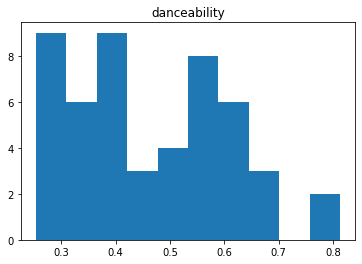

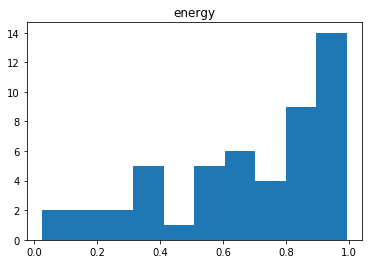

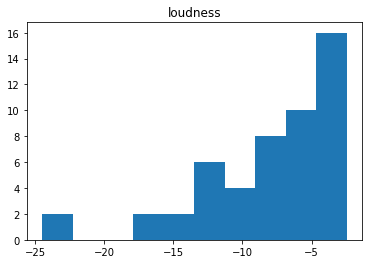

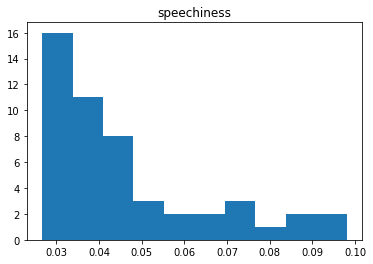

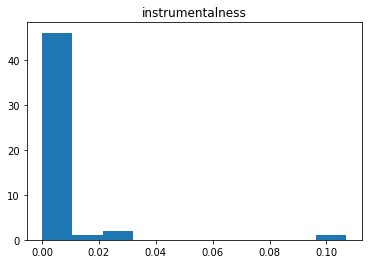

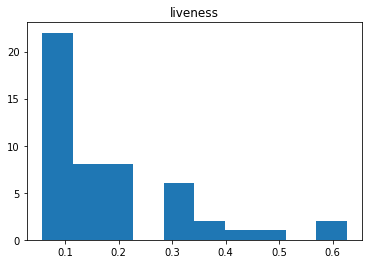

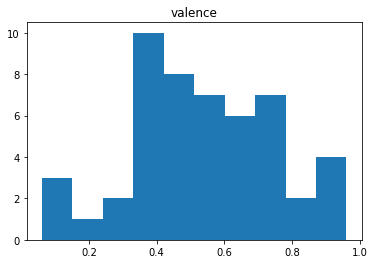

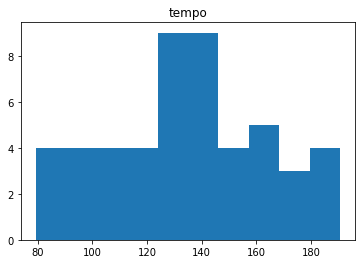

In [37]:
for col in numerical_cols:
    plt.hist(features_df[col])
    plt.title(col)
    plt.show()

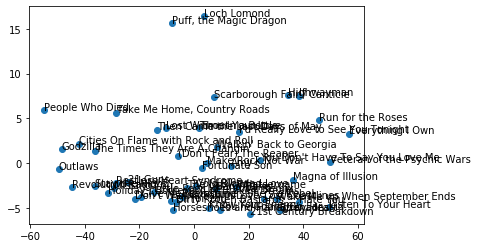

In [38]:
X = features_df[numerical_cols].values
pca = PCA(n_components=2)
coords = pca.fit_transform(X)
plt.scatter(coords[:,0], coords[:,1])

for i, txt in enumerate(features_df['track_name'].values):
    plt.annotate(txt, (coords[:,0][i], coords[:,1][i]))
    
plt.show()

In [39]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.97010836 0.02978392]
[200.50181557  35.13169354]


[0.253 0.826 0.0309 1.6e-06 0.0735 0.424]


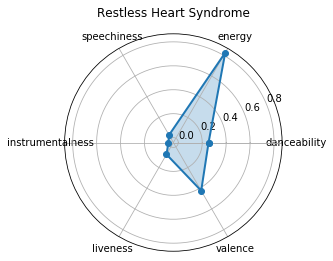

In [40]:
# Radar chart uwu

import seaborn as sns

#TODO -> some sort of normalization? I only used the features with default 0-1 range since otherwise the chart is jank
radar_columns = ['danceability', 'energy', 'speechiness',
       'instrumentalness', 'liveness', 'valence']

for index, song in features_df.iterrows():
    angles=np.linspace(0, 2*np.pi, len(radar_columns), endpoint=False)
    audio_features = song[radar_columns].values
    print(audio_features)
    audio_features=np.concatenate((audio_features,[audio_features[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    fig=plt.figure()
    
    
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, audio_features, 'o-', linewidth=2)
    ax.fill(angles, audio_features, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, radar_columns)
    ax.set_title(song["track_name"])
    ax.grid(True)
    break

In [41]:
# Normalize data in preparation for DBSCAN

'''
Most things are already 0-1 floats except for loudness (-60 to 0) and tempo (0 to ~225)
I'm just dividing by the range naively to get it to 0-1, idk if something is better
'''

X_normalized = features_df.copy()
X_normalized['tempo'] /= 225
X_normalized['loudness'] /= -60
X_normalized = X_normalized[numerical_cols].values

In [48]:
# Clustering using DBSCAN

from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=3).fit(X_normalized)
clustering.labels_



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])